**KNN**

According to this algorithm, which is used in classification, feature extraction during classification is used to look at the closeness of the new individual to be categorized to k of the previous individuals.
For example, you want to classify a new element for k = 3. in this case the nearest 3 of the old classified elements are taken. If these elements are included in the class, the new element is also included in that class. The euclide distance can be used in the distance calculation.

# Project - Classify Type of Patient from the biomechanical features of orthopedic patients.

# Install the necessary libraries


In [282]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import MinMaxScaler, StandardScaler


import seaborn as sns


# import data 2C_weka.csv for 2 Class Classifcation.


In [260]:
df=pd.read_csv("2Classdata.csv")

# Explore the data set.Get necessary information about the data.

Look at the head and tail of dataset.
Find the missing value.
Look at the unique values of class values.
Look at the distribution of class values and other attributes.
Get the datatype information about the dataset
Plot the distribution of different classes for pelvic_radius and sacral_slope for visualization.

In [229]:
#Head and tail of Data Set

print("Head\n",df.head())
print("Tail\n",df.tail())

#Find the missing value
df.info()
df.isna().sum()


df.isnull().sum()
#As seen below no missing values, all are non-null.

Head
    pelvic_incidence  pelvic_tilt numeric  lumbar_lordosis_angle  sacral_slope  \
0         63.027818            22.552586              39.609117     40.475232   
1         39.056951            10.060991              25.015378     28.995960   
2         68.832021            22.218482              50.092194     46.613539   
3         69.297008            24.652878              44.311238     44.644130   
4         49.712859             9.652075              28.317406     40.060784   

   pelvic_radius  degree_spondylolisthesis     class  
0      98.672917                 -0.254400  Abnormal  
1     114.405425                  4.564259  Abnormal  
2     105.985135                 -3.530317  Abnormal  
3     101.868495                 11.211523  Abnormal  
4     108.168725                  7.918501  Abnormal  
Tail
      pelvic_incidence  pelvic_tilt numeric  lumbar_lordosis_angle  \
305         47.903565            13.616688              36.000000   
306         53.936748            

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [230]:
# Look at the unique values of class values
df['class'].unique()

array(['Abnormal', 'Normal'], dtype=object)

In [231]:
# Look at the distribution of class values and other attributes.
df.groupby('class').count()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
class,,,,,,
Abnormal,210,210,210,210,210,210
Normal,100,100,100,100,100,100


In [218]:
#Get the datatype information about the dataset
df.dtypes

pelvic_incidence            float64
pelvic_tilt numeric         float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                         int32
dtype: object

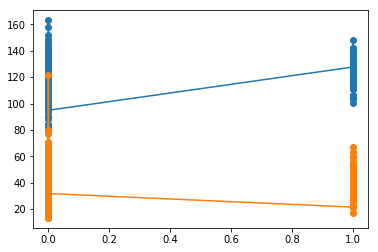

In [388]:
#Plot the distribution of different classes for pelvic_radius and sacral_slope for visualization.
import matplotlib.pyplot as plt
plt.plot(df['class'], df.pelvic_radius, marker = "o" )
plt.plot(df['class'], df.sacral_slope, marker = "o" )

# Encode the Class variable to integer.

In [261]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['class'])
df['class'] = le.transform(df['class'])

In [234]:
df.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0


# Create the X(Feature-set) and Y(Target-set) sets for your Data.

In [266]:
X=df.drop(labels="class", axis=1)
minmax = MinMaxScaler()

In [310]:
y=df['class']

# Normalize your Data (X) to get values between 0 to 1.

In [311]:
X = pd.DataFrame(minmax.fit_transform(X),columns=X.columns)

In [312]:
X.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,0.355688,0.519900,0.229180,0.250857,0.307461,0.025148
1,0.124501,0.296783,0.098578,0.144629,0.476649,0.036365
2,0.411666,0.513932,0.322995,0.307661,0.386097,0.017523
3,0.416151,0.557414,0.271260,0.289436,0.341826,0.051838
4,0.227272,0.289479,0.128129,0.247022,0.409579,0.044173


# Split the dat as train and test with a ratio of 70:30.

In [313]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [314]:
print("Shape of X_train = ", X_train.shape)
print("Shape of y_train = ", y_train.shape)
print("Shape of X_test = ", X_test.shape)
print("Shape of y_test = ", y_test.shape)

Shape of X_train =  (217, 6)
Shape of y_train =  (217,)
Shape of X_test =  (93, 6)
Shape of y_test =  (93,)


# Build the KNN model using Train Dataset and predict the class on test dataset.

In [315]:
KNH = KNeighborsClassifier(n_neighbors=5)
NoN=5

KNH.fit(X_train, y_train)
train_pred=KNH.predict(X_train)
accuracy_score(y_train, train_pred)

0.8755760368663594

In [316]:
test_pred=KNH.predict(X_test)

print("Accuracy for k = %s is %s" %(NoN, accuracy_score(y_test, test_pred)))

Accuracy for k = 5 is 0.7204301075268817


# Calculate the performance score of of your classification on test dataset.
Hint- You can use knn.score( ) function.

In [317]:
KNH.score(X_test,y_test)

0.7204301075268817

# What is the best K value for your classifcation?
#Find at which k value you get the best score.

In [192]:
from sklearn import metrics

In [193]:
print(metrics.confusion_matrix(y_test,predicted_lables))

[[54 12]
 [ 8 19]]


In [333]:
#NoN=number_of_neighbors
optimal_K = 1
model_error = 0
index = 0
df_index = []
df_values = []
dataframe_plot = pd.Series()
for NoN in np.arange(1,42,2):
    KNH = KNeighborsClassifier(n_neighbors=NoN)
    KNH.fit(X_train, y_train)
    test_error = 1 - accuracy_score(y_test, KNH.predict(X_test))
    df_index.append(NoN)
    df_values.append(test_error)
    if(index == 0):
        model_error = test_error
        index = 1
    if(model_error > test_error):
        model_error = test_error
        optimal_K = NoN
    
print("The optimal number of neighbour is ", optimal_K)

The optimal number of neighbour is  9


# import data 3C_weka.csv for 3 Class Classifcation and repeat all the steps which are given above.

In [364]:
dataf=pd.read_csv("3Classdata.csv")

In [365]:
print("Head\n",dataf.head())
print("Tail\n",dataf.tail())

Head
    pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
0         63.027818    22.552586              39.609117     40.475232   
1         39.056951    10.060991              25.015378     28.995960   
2         68.832021    22.218482              50.092194     46.613539   
3         69.297008    24.652878              44.311238     44.644130   
4         49.712859     9.652075              28.317406     40.060784   

   pelvic_radius  degree_spondylolisthesis   class  
0      98.672917                 -0.254400  Hernia  
1     114.405425                  4.564259  Hernia  
2     105.985135                 -3.530317  Hernia  
3     101.868495                 11.211523  Hernia  
4     108.168725                  7.918501  Hernia  
Tail
      pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
305         47.903565    13.616688              36.000000     34.286877   
306         53.936748    20.721496              29.220534     33.215251   
307   

In [366]:
# Look at the unique values of class values
dataf['class'].unique()

array(['Hernia', 'Spondylolisthesis', 'Normal'], dtype=object)

In [367]:
# Look at the distribution of class values and other attributes.
dataf.groupby('class').count()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
class,,,,,,
Hernia,60,60,60,60,60,60
Normal,100,100,100,100,100,100
Spondylolisthesis,150,150,150,150,150,150


In [368]:
#Get the datatype information about the dataset
dataf.dtypes

pelvic_incidence            float64
pelvic_tilt                 float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

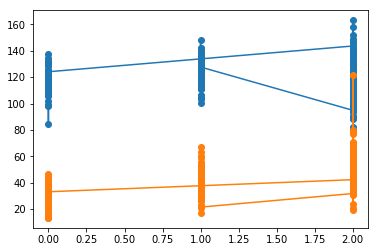

In [387]:
#Plot the distribution of different classes for pelvic_radius and sacral_slope for visualization.
#sns.pairplot(data=dataf, diag_kind='kde')
import matplotlib.pyplot as plt
plt.plot(dataf['class'], dataf.pelvic_radius, marker = "o" )
plt.plot(dataf['class'], dataf.sacral_slope, marker = "o" )

In [373]:
#Encode the Class variable to integer.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(dataf['class'])
dataf['class'] = le.transform(dataf['class'])

In [374]:
dataf.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0


In [375]:
#Create the X(Feature-set) and Y(Target-set) sets for your Data.
X3=dataf.drop(labels="class", axis=1)
minmax = MinMaxScaler()
y3=dataf['class']

In [376]:
#Normalize your Data (X) to get values between 0 to 1.

X3 = pd.DataFrame(minmax.fit_transform(X3),columns=X3.columns)
X3.tail()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
305,0.209822,0.360293,0.196881,0.193591,0.509380,0.015858
306,0.268009,0.487194,0.136211,0.183674,0.476223,0.024761
307,0.340438,0.522443,0.287897,0.234907,0.597796,0.019437
308,0.184257,0.272352,0.246846,0.214623,0.521175,0.026240
309,0.074202,0.207709,0.202620,0.142517,0.579240,0.025277


In [378]:
#Split the dat as train and test with a ratio of 70:30.

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.30, random_state=100)

print("Shape of X3_train = ", X3_train.shape)
print("Shape of y3_train = ", y3_train.shape)
print("Shape of X3_test = ", X3_test.shape)
print("Shape of y3_test = ", y3_test.shape)

Shape of X3_train =  (217, 6)
Shape of y3_train =  (217,)
Shape of X3_test =  (93, 6)
Shape of y3_test =  (93,)


In [359]:
#Build the KNN model using Train Dataset and predict the class on test dataset.

KNH = KNeighborsClassifier(n_neighbors=5, weights = 'distance' )

NoN=5

KNH.fit(X3_train, y3_train)
train_pred=KNH.predict(X3_train)
accuracy_score(y3_train, train_pred)

1.0

In [360]:
test_pred=KNH.predict(X3_test)

#Calculate the performance score of of your classification on test dataset

print("Accuracy for k = %s is %s" %(NoN, accuracy_score(y3_test, test_pred)))

Accuracy for k = 5 is 0.7204301075268817


The optimal number of neighbour is  1


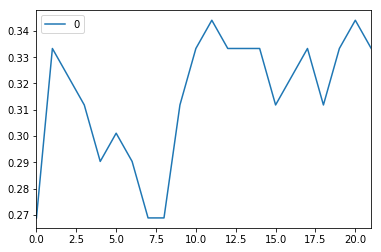

In [379]:
#What is the best K value for your classifcation?
#Find at which k value you get the best score

#NoN=number_of_neighbors

optimal_K = 1
model_error = 0
index = 0
df_index = []
df_values = []
dataframe_plot = pd.Series()
for NoN in np.arange(1,45,2):
    KNH = KNeighborsClassifier(n_neighbors=NoN)
    KNH.fit(X3_train, y3_train)
    test_error = 1 - accuracy_score(y3_test, KNH.predict(X3_test))
    df_index.append(NoN)
    df_values.append(test_error)
    if(index == 0):
        model_error = test_error
        index = 1
    if(model_error > test_error):
        model_error = test_error
        optimal_K = NoN
    
print("The optimal number of neighbour is ", optimal_K)
df_plt=pd.DataFrame(df_values)
df_plt.plot()